In [2]:
from tbparse import SummaryReader
# log_dir = "results/stepping/0/2024-07-02_22-03-08"
log_dir = "log_results/1/"
reader = SummaryReader(log_dir, extra_columns={'dir_name'})
df = reader.scalars
print(df)

         step                  tag       value             dir_name
0      500000  eval/mean_ep_length  512.000000  2024-11-12_09-20-36
1     1000000  eval/mean_ep_length  512.000000  2024-11-12_09-20-36
2      500000     eval/mean_reward  408.679474  2024-11-12_09-20-36
3     1000000     eval/mean_reward  411.687256  2024-11-12_09-20-36
4      500000    eval/success_rate    0.000000  2024-11-12_09-20-36
...       ...                  ...         ...                  ...
6901   987136     train/value_loss    0.016193  2024-11-14_13-42-07
6902   991232     train/value_loss    0.012369  2024-11-14_13-42-07
6903   995328     train/value_loss    0.012650  2024-11-14_13-42-07
6904   999424     train/value_loss    0.009548  2024-11-14_13-42-07
6905  1000000     train/value_loss    0.010595  2024-11-14_13-42-07

[6906 rows x 4 columns]


In [3]:
df['labels'] = None
df.loc[df['dir_name'] == '2024-11-12_09-20-36', 'labels'] = 'Trial 1'
df.loc[df['dir_name'] == '2024-11-14_13-42-07', 'labels'] = 'Trial 2'
df

,step,tag,value,dir_name,labels
0,500000,eval/mean_ep_length,512.000000,2024-11-12_09-20-36,Trial 1
1,1000000,eval/mean_ep_length,512.000000,2024-11-12_09-20-36,Trial 1
2,500000,eval/mean_reward,408.679474,2024-11-12_09-20-36,Trial 1
3,1000000,eval/mean_reward,411.687256,2024-11-12_09-20-36,Trial 1
4,500000,eval/success_rate,0.000000,2024-11-12_09-20-36,Trial 1
...,...,...,...,...,...
6901,987136,train/value_loss,0.016193,2024-11-14_13-42-07,Trial 2
6902,991232,train/value_loss,0.012369,2024-11-14_13-42-07,Trial 2
6903,995328,train/value_loss,0.012650,2024-11-14_13-42-07,Trial 2
6904,999424,train/value_loss,0.009548,2024-11-14_13-42-07,Trial 2


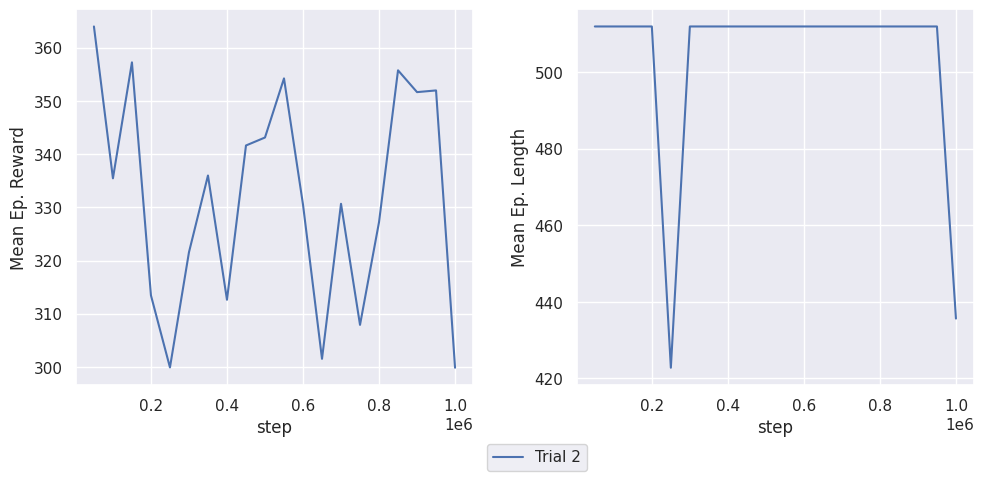

In [9]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

#set seaborn plotting aesthetics as default
sns.set_theme()

# Create subplots with legend=False
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df2 = df[(df['tag']=='eval/mean_reward') & (df['labels']=='Trial 2')]
df3 = df[(df['tag']=='eval/mean_ep_length') & (df['labels']=='Trial 2')]


sns.lineplot(data=df2, x='step', y='value', hue='labels', ax=axes[0], legend=False, )
sns.lineplot(data=df3, x='step', y='value', hue='labels', ax=axes[1])

axes[0].set_ylabel('Mean Ep. Reward')
axes[1].set_ylabel('Mean Ep. Length')

# # change the fontsize
# axes[0].tick_params(axis='x', labelsize=20)
# axes[0].tick_params(axis='y', labelsize=20)

# Create a legend for the first subplot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels, ncol=len(labels), loc='lower center', bbox_to_anchor=(-0.1, -0.25)) #title='Legend'

# fig.suptitle(' Evaluation ', fontsize=15)

plt.tight_layout()
plt.show()

pdf_path = log_dir + '2024-11-14_13-42-07' + '/imgs/'
os.makedirs(pdf_path, exist_ok=True)

fig.savefig(pdf_path + "evaluation.pdf", bbox_inches='tight', dpi=300, transparent=False)

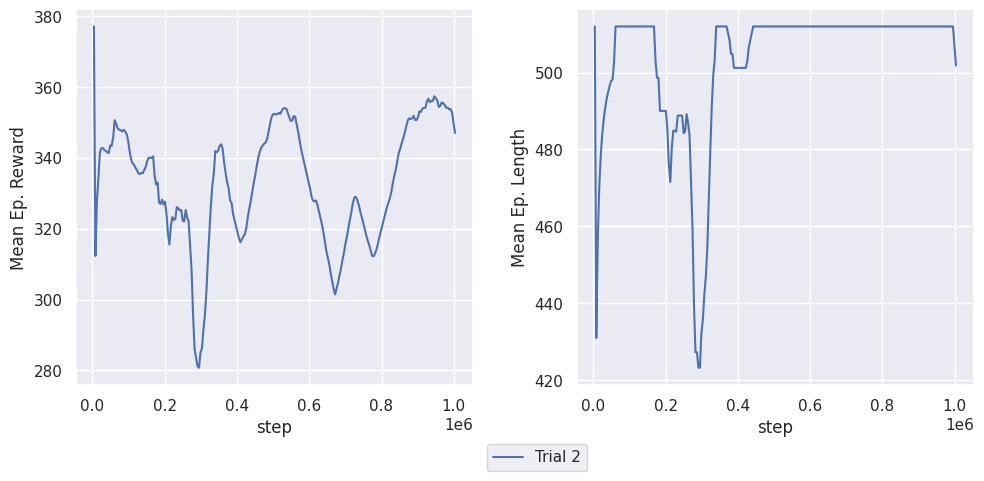

In [10]:
# Create subplots with legend=False
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df2 = df[(df['tag']=='rollout/ep_rew_mean') & (df['labels']=='Trial 2')]
df3 = df[(df['tag']=='rollout/ep_len_mean') & (df['labels']=='Trial 2')]


sns.lineplot(data=df2, x='step', y='value', hue='labels', ax=axes[0], legend=False, )
sns.lineplot(data=df3, x='step', y='value', hue='labels', ax=axes[1])

axes[0].set_ylabel('Mean Ep. Reward')
axes[1].set_ylabel('Mean Ep. Length')

# Create a legend for the first subplot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels, ncol=len(labels), loc='lower center', bbox_to_anchor=(-0.1, -.25)) # title='Legend'

# fig.suptitle(' Rollout ', fontsize=15)

plt.tight_layout()
plt.show()

fig.savefig(pdf_path + "rollout.pdf", bbox_inches='tight', dpi=300, transparent=False)

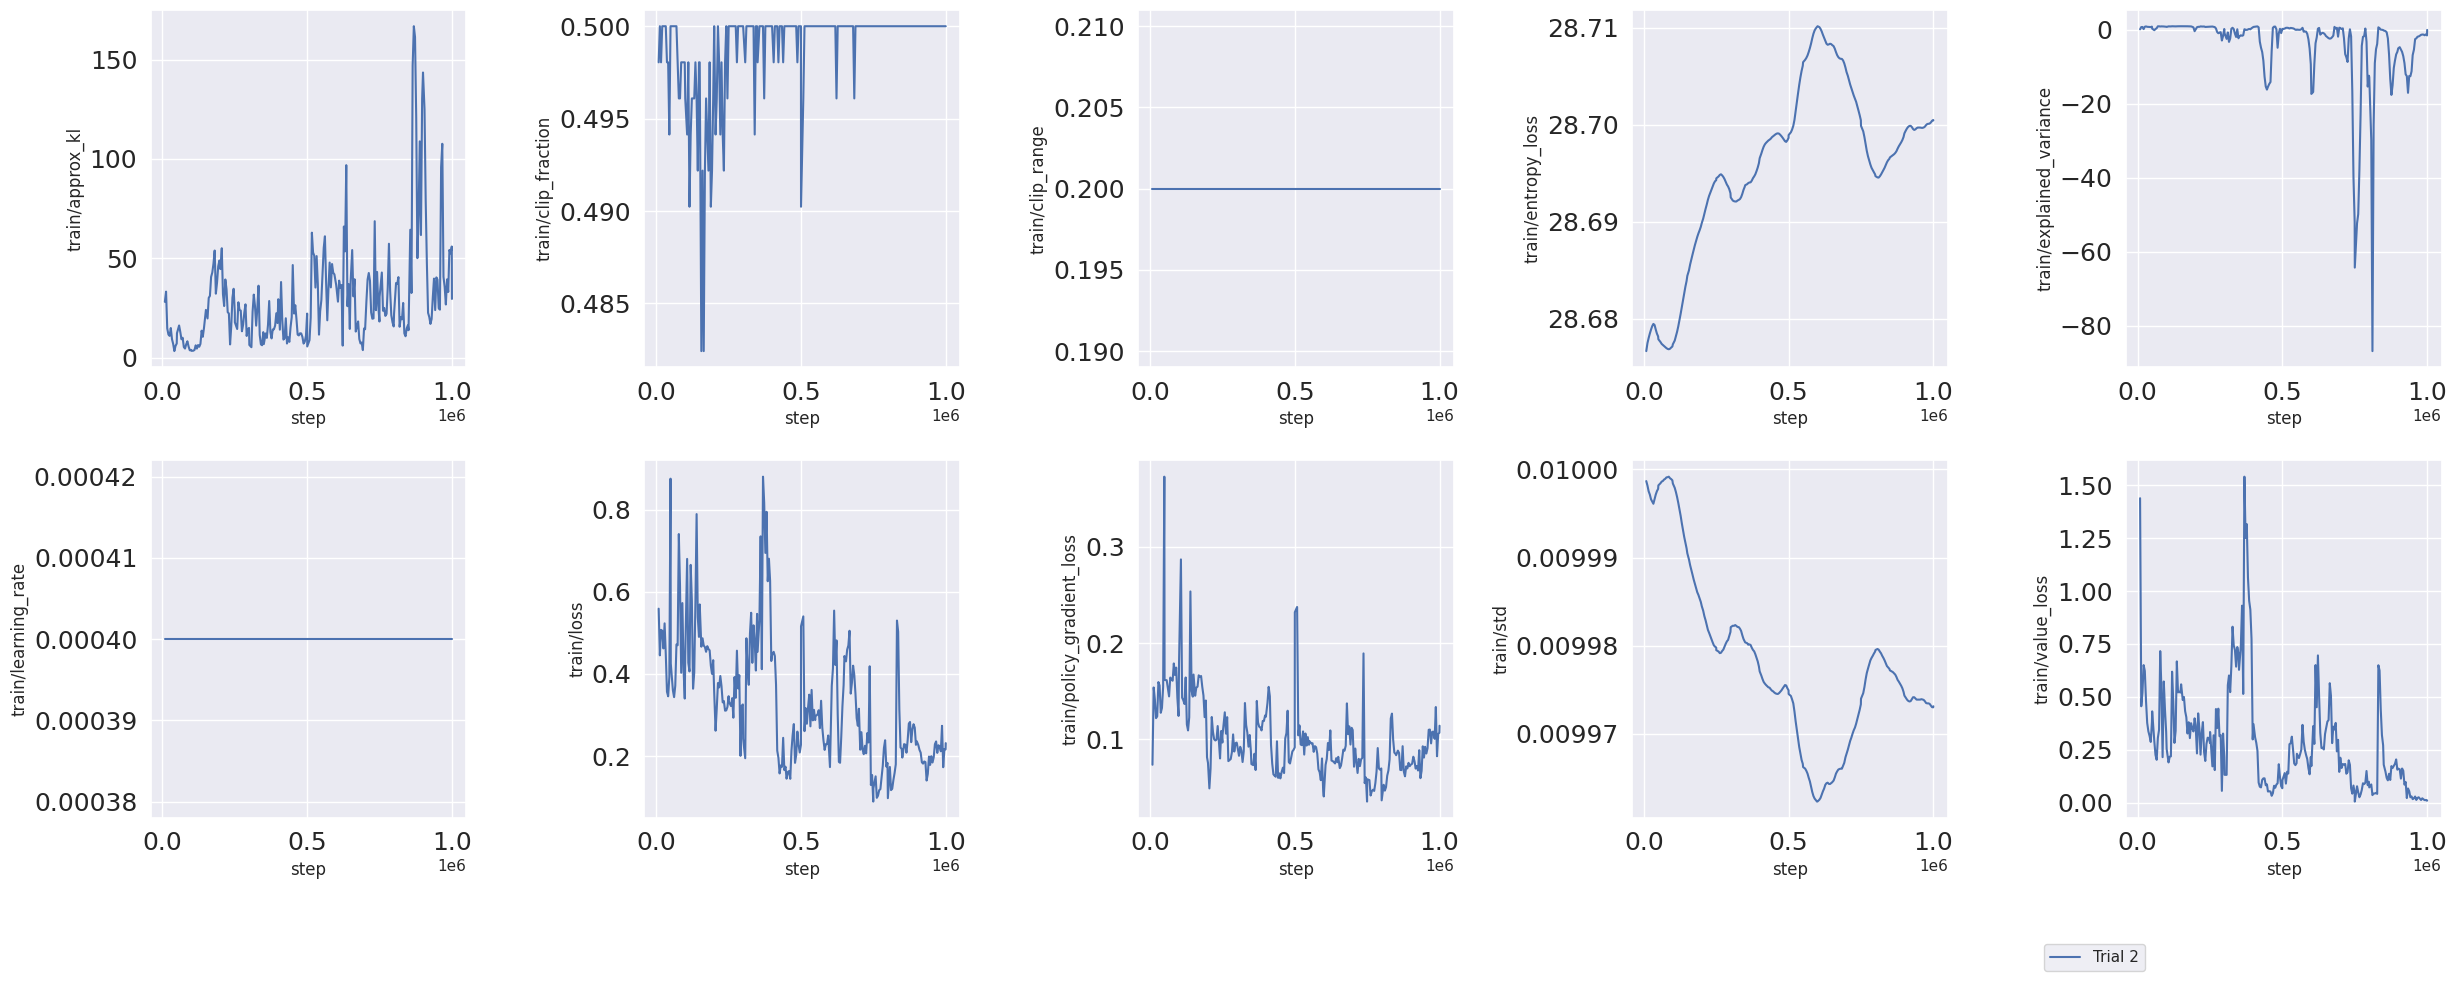

In [11]:
df = df[(df['tag'].str.contains('train')) & (df['labels']=='Trial 2')]

# Get unique string values of the 'tag' column
unique_tags = list(df['tag'].unique())

# Create subplots with legend=False
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

id = 0
for i in range(2):
    for j in range(5):
        if id==9:
            sns.lineplot(data=df[df['tag'] == unique_tags[id]], x='step', y='value', hue='labels', ax=axes[i][j],)
        else:
            sns.lineplot(data=df[df['tag'] == unique_tags[id]], x='step', y='value', hue='labels', ax=axes[i][j], legend=False, )
        id+=1

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust horizontal and vertical space

id = 0
for i in range(2):
    for j in range(5):
        axes[i][j].set_ylabel(unique_tags[id])
        id+=1        

# Create a legend for the first subplot
handles, labels = axes[1][4].get_legend_handles_labels()
axes[1][4].legend(handles=handles, labels=labels, ncol=len(labels), loc='lower center', bbox_to_anchor=(-0.1, -.45)) #title='Legend'

# change the fontsize
for i in range(2):
    for j in range(5):
        axes[i][j].tick_params(axis='x', labelsize=18)
        axes[i][j].tick_params(axis='y', labelsize=18)

# fig.suptitle(' PPO Training ', fontsize=15)

# Setting the font size
sns.set_theme(font_scale=1.7)

plt.tight_layout()
plt.show()

fig.savefig(pdf_path + "net_training.pdf", bbox_inches='tight', dpi=300, transparent=False)